<a href="https://colab.research.google.com/github/ahaque12/538-squid-game/blob/main/538_Riddler_Classic_October_29%2C_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 538 Riddler Classic - Can you survive the squid game riddler?

https://fivethirtyeight.com/features/can-you-survive-squid-game-riddler/

Congratulations, you’ve made it to the fifth round of The Squiddler — a competition that takes place on a remote island. In this round, you are one of the 16 remaining competitors who must cross a bridge made up of 18 pairs of separated glass squares. Here is what the bridge looks like from above:

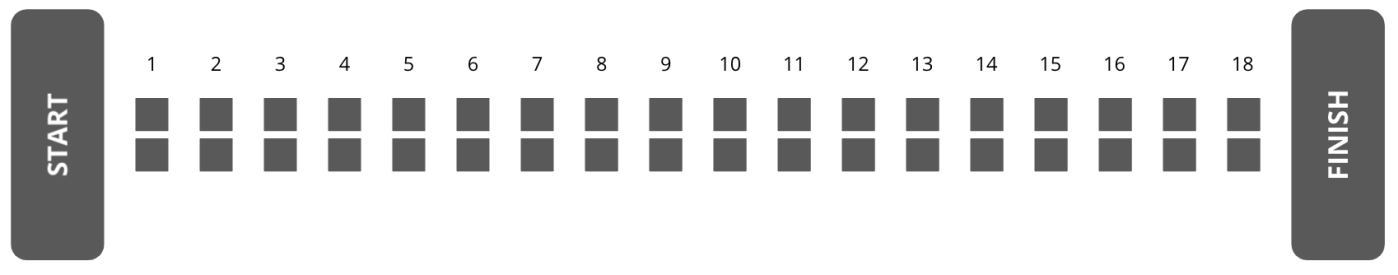

To cross the bridge, you must jump from one pair of squares to the next. However, you must choose one of the two squares in a pair to land on. Within each pair, one square is made of tempered glass, while the other is made of normal glass. If you jump onto tempered glass, all is well, and you can continue on to the next pair of squares. But if you jump onto normal glass, it will break, and you will be eliminated from the competition.

You and your competitors have no knowledge of which square within each pair is made of tempered glass. The only way to figure it out is to take a leap of faith and jump onto a square. Once a pair is revealed — either when someone lands on a tempered square or a normal square — all remaining competitors take notice and will choose the tempered glass when they arrive at that pair.

On average, how many of the 16 competitors will survive and make it to the next round of the competition?

# Solution

We can solve this problem using recursion. The expected number of people who 
survive a game with $n$ glass panel pairs and $r$ people is equal to accumulating over each scenario where the first person falls through any panel 1 to $n$ and multiplying the probability of that scenario by the expected number of people who survive a game with the remaining unbroken glass panels and $r-1$ people.  

Let 
\begin{align}
f(n, r) &= \text{Expected number of people who survive game with $n$ glass panel pairs and $r$ people} 
\end{align}

Then

\begin{align}
f(n, r) &= \frac{1}{2^n} + \sum_{i=1}^n \frac{1}{2^n} * f(n-i, r-1) \\
f(n, 0) &= 0 \\
f(0, r) &= r 
\end{align}

In [ ]:
from functools import lru_cache

In [ ]:
@lru_cache(maxsize=2**10)
def squid_game(glass_pairs, people):
  """ Returns number of people expected to survive the squid game.

  To cross the bridge, you must jump from one pair of squares to the next. 
  However, you must choose one of the two squares in a pair to land on. 
  Within each pair, one square is made of tempered glass, while the other 
  is made of normal glass. If you jump onto tempered glass, all is well, 
  and you can continue on to the next pair of squares. But if you jump onto 
  normal glass, it will break, and you will be eliminated from the competition.
  You and your competitors have no knowledge of which square within each pair 
  is made of tempered glass. The only way to figure it out is to take a leap 
  of faith and jump onto a square. Once a pair is revealed — either when 
  someone lands on a tempered square or a normal square — all remaining 
  competitors take notice and will choose the tempered glass when they arrive 
  at that pair.

  Parameters
  ----------
  glass_pairs: int, required
    Number of glass panel pairs to step on.

  people: int, required
    Number of people playing the game.

  Returns
  -------
  expected_people: float
    Expected number of people to make it across the game.
  """

  if glass_pairs < 0 or people < 0:
    raise ValueError("Numbers must be non-negative!")

  if glass_pairs == 0:
    return people
  elif people == 0:
    return 0
  elif people == 1:
    return .5**glass_pairs

  # Start with scenario if the first person makes it across all panels.
  total = (people) * (.5**glass_pairs)

  # Avoid exponent every iteration.
  prob_current_glass_break = .5

  # Accumulate expected outcomes over each scenario of the first person crossing
  # and the glass breaking at `successful steps`.
  for successful_steps in range(1, glass_pairs + 1): 
    total += (prob_current_glass_break) * squid_game(glass_pairs - successful_steps, 
                                         people - 1)

    # Probability of glass at successful_steps + 1 breaking is half of the 
    # prior step.
    prob_current_glass_break *= .5

  return total
  

In [ ]:
assert squid_game(2, 1) == .25, ValueError("One person has a 25% probability of making it across two panels!")
assert squid_game(2, 2) == 2*.25 + 1*.25 + .25, ValueError("If two people cross two panels the expected number of people to cross is 1!")

In [ ]:
squid_game(18, 16)

7.0000762939453125

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

sns.set(rc={'figure.figsize':(12, 12)})

In [ ]:
outcomes = []
for glass_panels in range(1, 20):
  for people in range(1, glass_panels):
    outcomes.append((glass_panels,people, squid_game(glass_panels, people) / people))

In [ ]:
df = pd.DataFrame(outcomes, columns=["Glass panel pairs", "People", "Survival %"])
df = df.pivot("Glass panel pairs", "People", "Survival %").sort_values("Glass panel pairs", ascending=False)
df.head()

People,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Glass panel pairs,,,,,,,,,,,,,,,,,,
19,0.000002,0.000020,0.000135,0.000654,0.002444,0.007334,0.018220,0.038398,0.070109,0.113099,0.164289,0.218962,0.272616,0.322302,0.366841,0.406275,0.441179,0.472222
18,0.000004,0.000038,0.000244,0.001125,0.003989,0.011345,0.026716,0.053419,0.092735,0.142735,0.198819,0.255672,0.309226,0.357464,0.400049,0.437505,0.470588,NaN
17,0.000008,0.000072,0.000440,0.001921,0.006441,0.017323,0.038584,0.073077,0.120513,0.177009,0.236721,0.294350,0.346745,0.392951,0.433343,0.468750,NaN,NaN
16,0.000015,0.000137,0.000788,0.003250,0.010281,0.026077,0.054816,0.098190,0.153746,0.215646,0.277401,0.334417,0.384797,0.428591,0.466668,NaN,NaN,NaN
15,0.000031,0.000259,0.001404,0.005447,0.016205,0.038651,0.076503,0.129440,0.192434,0.258102,0.320163,0.375351,0.423117,0.464288,NaN,NaN,NaN,NaN


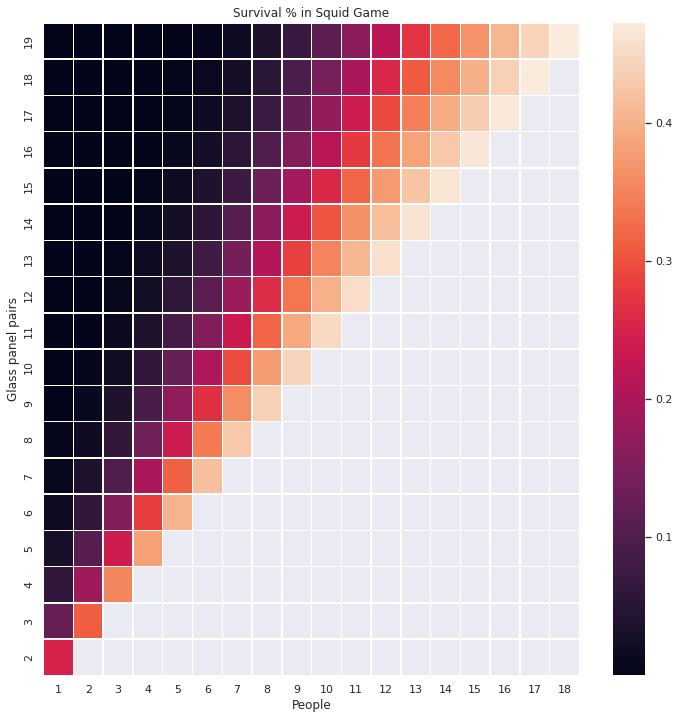

In [ ]:
ax = sns.heatmap(df, annot=False, linewidths=.5)
ax.set_title("Survival % in Squid Game");